# Problem Statement

# Context

# DATASET ALL DETAILS

In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [8]:
df= pd.read_csv(r'C:\Users\HP\Desktop\Project\House rent Prediction\data\House_Rent_Dataset.csv')
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [12]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

# Inference above statement
*** Theres is no null value for any column in the dataset***

In [16]:
# find statistics
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


# DATA ANALYSIS AND VISUALIZATION

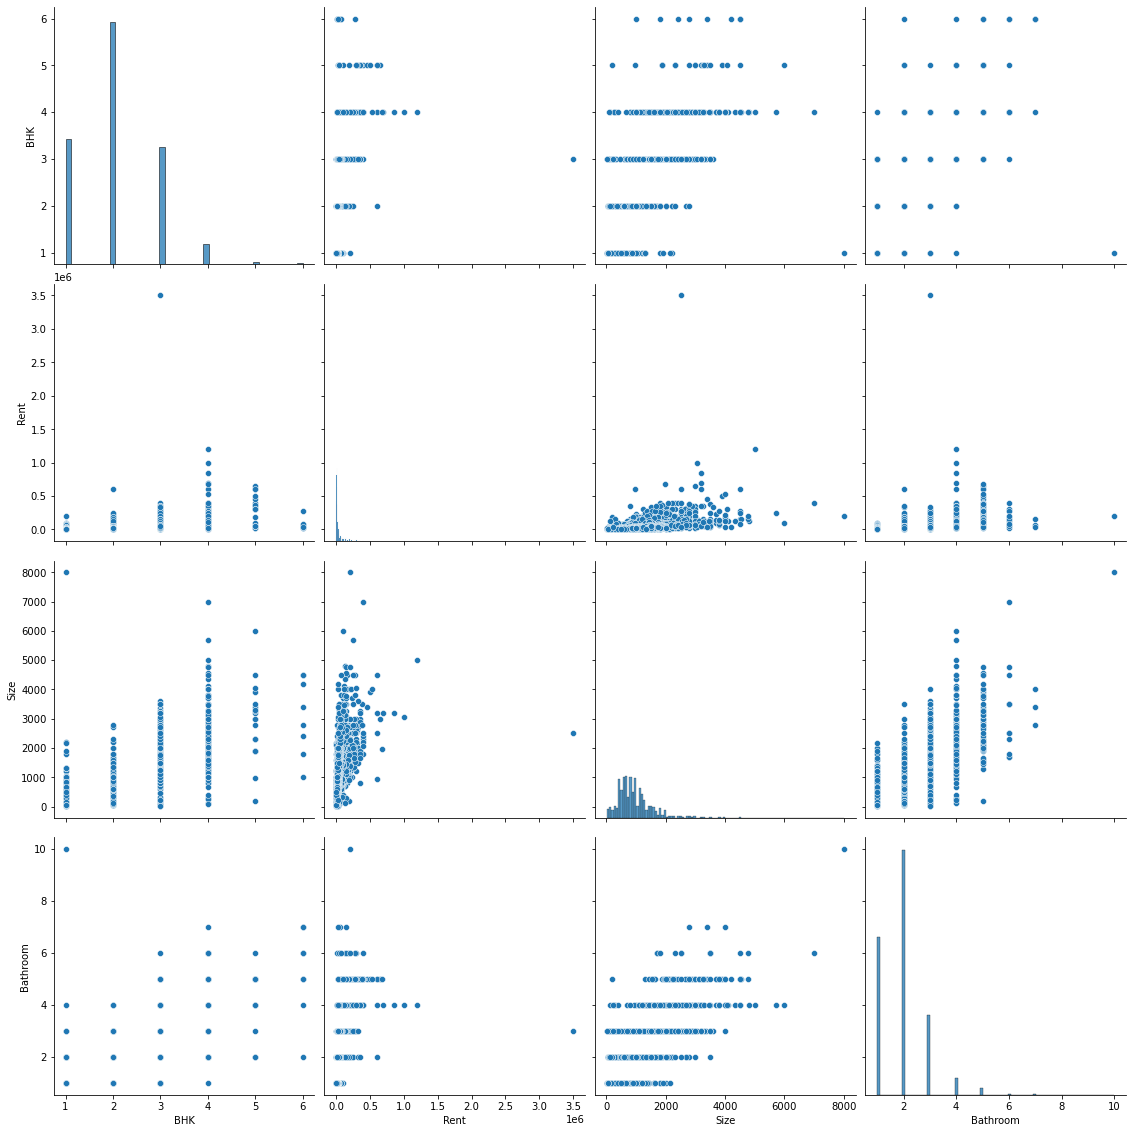

In [17]:
# Pairplot of whole data

sns.pairplot(df,height = 4)
plt.show()

# Handling integer dtype.(Rent,BHK,size,bathroom)
# Univariate analysis


***Rent***

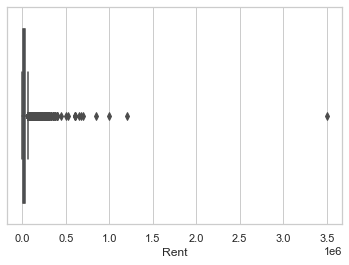

In [45]:
sns.set_theme(style="whitegrid")
sns.boxplot(df['Rent'])
plt.show()


# Inference above statemnt
Theres is one outlier so far out of the inter-quantile range

***we have remove this outlier, it may be effect our assumption***

In [52]:
# Checking the position of Outlier

print(np.where(df['Rent']>2000000))

(array([1837], dtype=int64),)


# Inference above statement

***Outlier position is at 1837th positio in the dataframe***

In [54]:
# Delete this Outlier

df.drop([1837], axis = 0 , inplace =True)

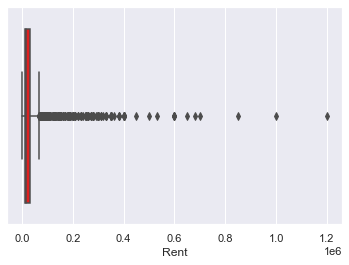

In [60]:
sns.set_theme()
sns.boxplot(df['Rent'],color='red')
plt.show()

# """after deleting the above outlier , check the rent prices by boxplot"""

# Handling BHK integer  dtype

In [62]:
df['BHK'].value_counts()

2    2265
1    1167
3    1097
4     189
5      19
6       8
Name: BHK, dtype: int64

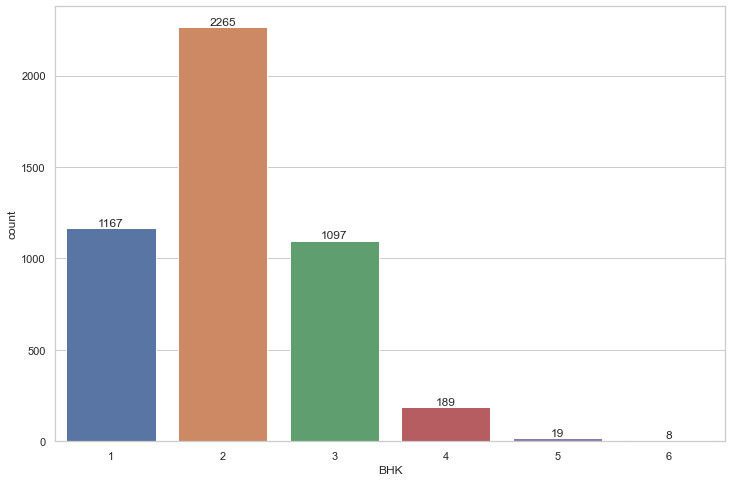

In [79]:
sns.set_style('whitegrid')
plt.figure(figsize = (12,8))
ax= sns.countplot(x = 'BHK' , data=df)
ax.bar_label(ax.containers[0])
plt.show()

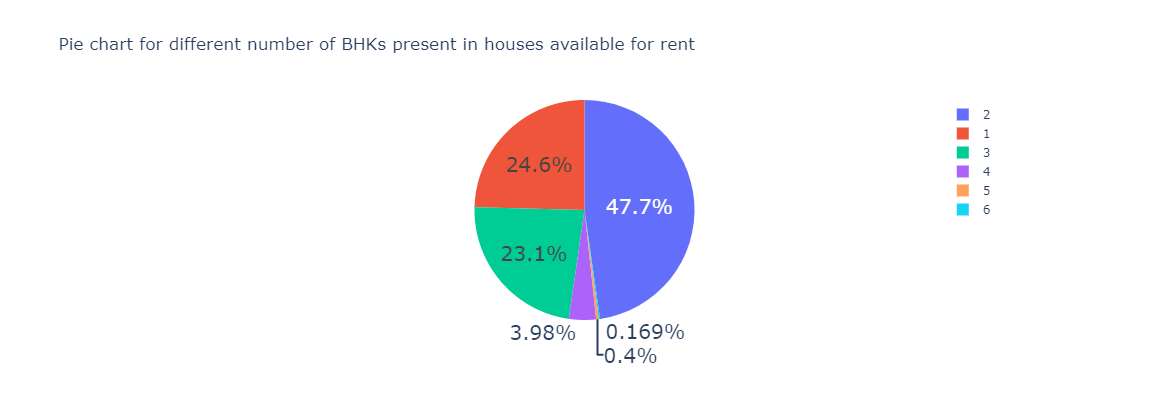

In [94]:
fig_pie = px.pie(df, names='BHK', height = 400, width = 600,title='Pie chart for different number of BHKs present in houses available for rent')
fig_pie.update_traces(textfont_size=20)
fig_pie.show()

# Inference above piechart

--- Mostly 2BHK house are rented the most, it is uunder budget for the people and can be rented soon

--- 5 and 6 BHK house are put  less for rent less demand for big houses

# Handling Bathroom (Integer type)

In [95]:
df['Bathroom'].value_counts()

2     2291
1     1474
3      748
4      156
5       60
6       12
7        3
10       1
Name: Bathroom, dtype: int64

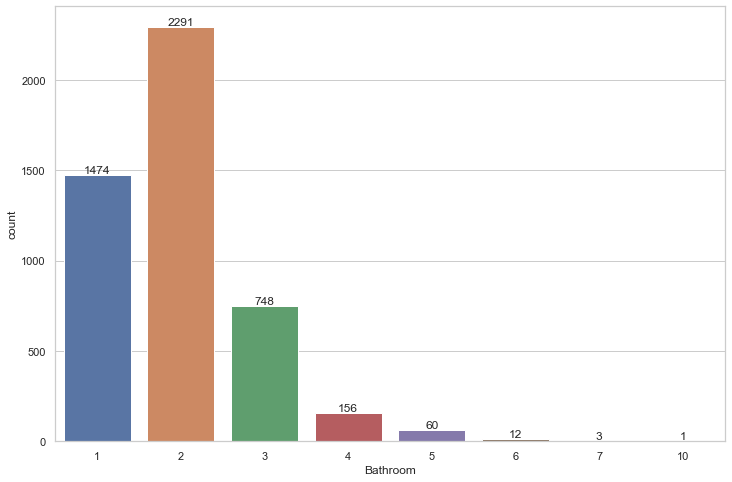

In [96]:
sns.set_style('whitegrid')
plt.figure(figsize = (12,8))
ax= sns.countplot(x = 'Bathroom' , data=df)
ax.bar_label(ax.containers[0])
plt.show()

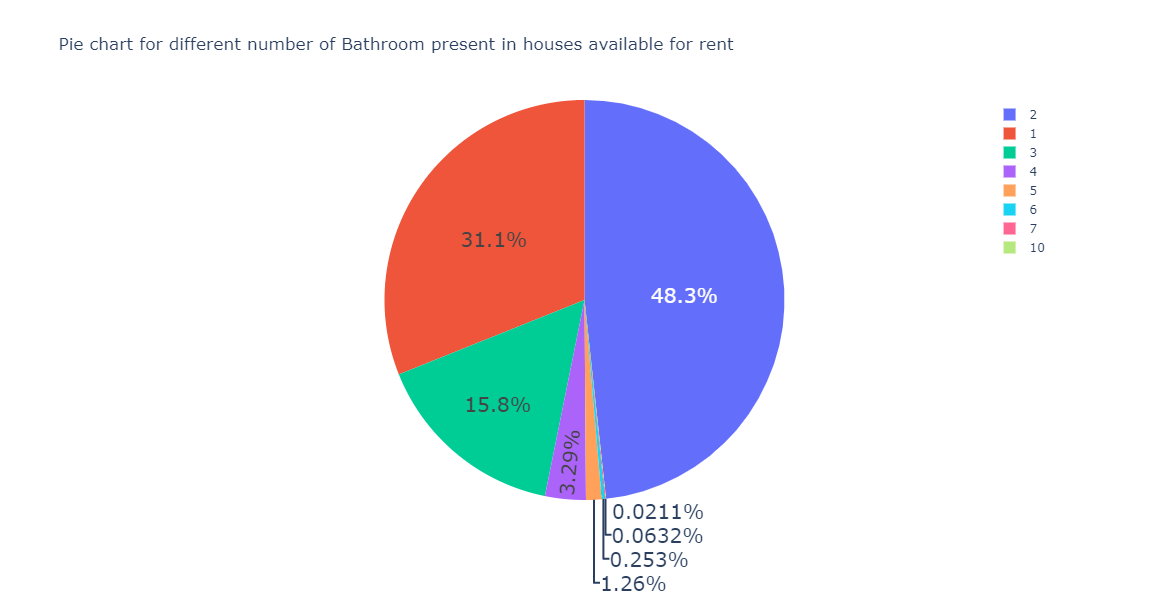

In [100]:
fig_pie = px.pie(df, names='Bathroom', height = 600, width = 800,title='Pie chart for different number of Bathroom present in houses available for rent')
fig_pie.update_traces(textfont_size=20)
fig_pie.show()

# Inference above bathroom pie chart

--- House with 2 Bathroom are most common for the houses put up on rent

--- Houses with 7  and 10  Bathroom not in use for rent purpose

# Handling size (Integer dtye)